Health Analytics Group Project

Modeling: Random Forest

In [27]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.model_selection as cv
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_squared_log_error,make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import brier_score_loss

In [3]:
df=pd.read_csv("final_data.csv")
df=pd.DataFrame(df)
df=df.drop("Unnamed: 0", axis=1)
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,MentHlth,PhysHlth,DiffWalk,NoDiabetes,PreDiabetes,HasDiabetes,ExcellentGenHealth,VeryGoodGenHealth,GoodGenHealth,FairGenHealth,PoorGenHealth,Age18to24,Age25to29,Age30to34,Age35to39,Age40to44,Age45to49,Age50to54,Age55to59,Age60to64,Age65to69,Age70to74,Age75to79,Age80Plus,EducationNoElementary,EducationElementary,EducationSomeHS,EducationHSGrad,EducationSomeCollege,EducationCollegeGrad,IncomeUnder10k,Income10kto15k,Income15kto20k,Income20kto25k,Income25kto35k,Income35kto50k,Income50kto75k,IncomeOver75k,Male,Female
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,18.0,15.0,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,30.0,30.0,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [5]:
(train,test) = cv.train_test_split(df, test_size=.20)

In [6]:
train

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,MentHlth,PhysHlth,DiffWalk,NoDiabetes,PreDiabetes,HasDiabetes,ExcellentGenHealth,VeryGoodGenHealth,GoodGenHealth,FairGenHealth,PoorGenHealth,Age18to24,Age25to29,Age30to34,Age35to39,Age40to44,Age45to49,Age50to54,Age55to59,Age60to64,Age65to69,Age70to74,Age75to79,Age80Plus,EducationNoElementary,EducationElementary,EducationSomeHS,EducationHSGrad,EducationSomeCollege,EducationCollegeGrad,IncomeUnder10k,Income10kto15k,Income15kto20k,Income20kto25k,Income25kto35k,Income35kto50k,Income50kto75k,IncomeOver75k,Male,Female
207817,0.0,0.0,1.0,1.0,26.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
153959,0.0,0.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
45780,0.0,0.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,6.0,0.0,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
141435,0.0,0.0,0.0,1.0,22.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
92758,0.0,1.0,0.0,1.0,27.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157307,0.0,0.0,0.0,1.0,29.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,3.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
213394,0.0,0.0,0.0,1.0,25.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
88317,0.0,0.0,0.0,1.0,24.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
84770,1.0,1.0,1.0,1.0,23.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,3.0,4.0,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [7]:
test

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,MentHlth,PhysHlth,DiffWalk,NoDiabetes,PreDiabetes,HasDiabetes,ExcellentGenHealth,VeryGoodGenHealth,GoodGenHealth,FairGenHealth,PoorGenHealth,Age18to24,Age25to29,Age30to34,Age35to39,Age40to44,Age45to49,Age50to54,Age55to59,Age60to64,Age65to69,Age70to74,Age75to79,Age80Plus,EducationNoElementary,EducationElementary,EducationSomeHS,EducationHSGrad,EducationSomeCollege,EducationCollegeGrad,IncomeUnder10k,Income10kto15k,Income15kto20k,Income20kto25k,Income25kto35k,Income35kto50k,Income50kto75k,IncomeOver75k,Male,Female
187484,0.0,0.0,0.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,14.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
104123,0.0,0.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
28886,0.0,1.0,1.0,1.0,45.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
170892,0.0,0.0,0.0,1.0,39.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
237649,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,30.0,0.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42509,0.0,1.0,0.0,1.0,33.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
162344,0.0,0.0,0.0,1.0,23.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
100685,0.0,1.0,0.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,30.0,25.0,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
82418,0.0,1.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,20.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [8]:
x_train=train.drop("HeartDiseaseorAttack", axis=1)
y_train=train["HeartDiseaseorAttack"]

x_test=test.drop("HeartDiseaseorAttack", axis=1)

y_test=test["HeartDiseaseorAttack"]

**Random Forest**

In [23]:
mod=RandomForestRegressor(n_estimators=100)
model=make_pipeline(mod)
print(model)


Pipeline(steps=[('randomforestregressor', RandomForestRegressor())])


In [24]:
kfold=KFold(n_splits=5)
model.fit(x_train,y_train)
score=cross_val_score(model,x_train,y_train,cv=kfold)
score

array([0.08127095, 0.07942033, 0.08577377, 0.06765106, 0.08771841])

In [25]:
yp=model.predict(x_test)
print(r2_score(y_test,yp),'Rsquare')
print(mean_squared_error(y_test,yp), 'MSE')
print(mean_squared_log_error(y_test,yp),'MSLE')

0.08075042910849595 Rsquare
0.07859306178467154 MSE
0.0402766251941041 MSLE


In [28]:
brier_score_loss(y_test, yp)

0.07859306178467154

<BarContainer object of 52 artists>

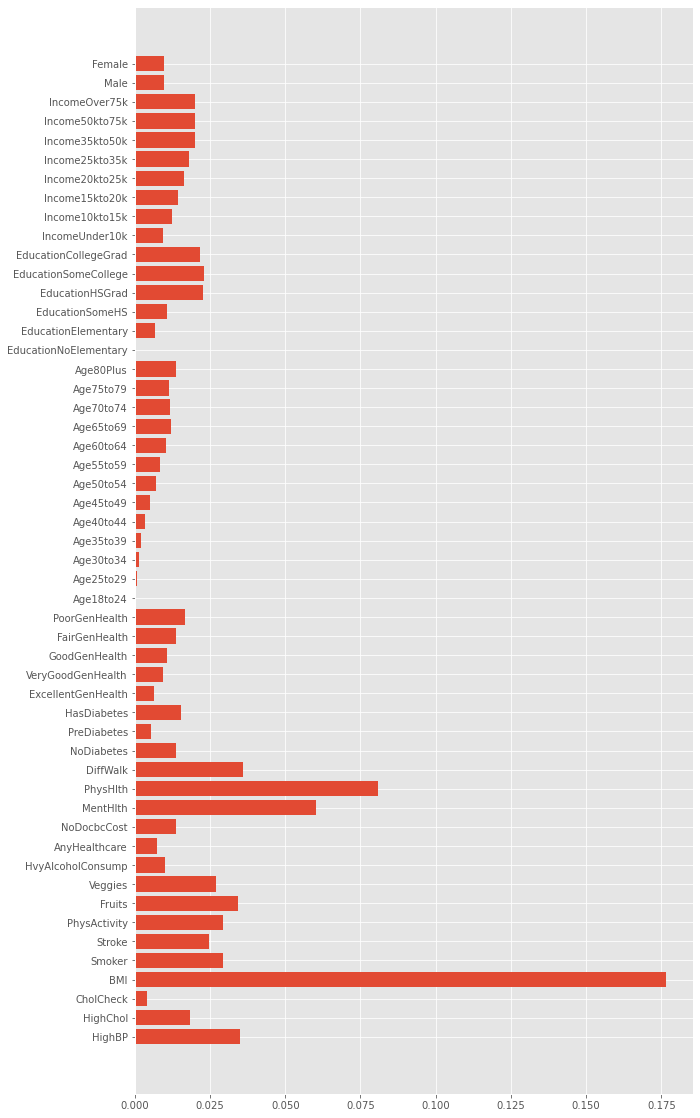

In [50]:
plt.figure(figsize=(10,20))
plt.barh(x_train.columns.values, mod.feature_importances_)
